This project analyses the socio-economic indicators dataset released by the <a href='https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2/about_data?utm_content=000026UJ&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01&utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_term=10006555'>city of Chicago</a>. 

In [ ]:
#install and load the sql extension
!pip install ipython-sql
%load_ext sql
!pip install pandas
import csv, sqlite3



In [43]:

%sql sqlite:///socioeconomic.db
con = sqlite3.connect('socioeconomic.db')
cur = con.cursor()

read the csv files in the given url in pandas and convert them to sql tables

In [44]:
import pandas as pd
df = pd.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql('chicago_SE_data', con, if_exists='replace', index=False, method='multi')


78

In [ ]:
#import ipython-sql and prettytable libraries
!pip install ipython-sql prettytable

#prettytable is used to display the data as formatted table
import prettytable as pt

pt.DEFAULT = 'DEFAULT'

In [46]:
#verify the table creation
%sql SELECT * FROM chicago_SE_data limit 5;

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


Problem 1: How many rows are there in the table?

In [47]:
%sql SELECT COUNT(*) FROM chicago_SE_data;

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
78


Problem 2: How many community areas in Chicago have a hardship index greater than 50.0?

In [48]:
%sql SELECT COUNT(*) FROM  chicago_SE_data WHERE(hardship_index > 50.0);

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
38


Problem 3: What is the maximum vlaue of hardship index in this data?

In [49]:
%%sql 
SELECT MAX(hardship_index), community_area_name FROM chicago_SE_data;


 * sqlite:///socioeconomic.db
Done.


MAX(hardship_index),community_area_name
98.0,Riverdale


Problem 4: Which community area has the maximum hardship index?

In [50]:
%%sql
SELECT community_area_name FROM chicago_SE_data ORDER BY hardship_index DESC LIMIT 1;

 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


Problem 6: Which Chicago community areas have per capita income greater than 60,000?

In [51]:
%sql SELECT community_area_name FROM chicago_SE_data WHERE(per_capita_income_ > 60000);

 * sqlite:///socioeconomic.db
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


Problem 6: Create a scatter plot using the variables per capita income and hardship index. Explain any relation.

 * sqlite:///socioeconomic.db
Done.
 * sqlite:///socioeconomic.db
Done.


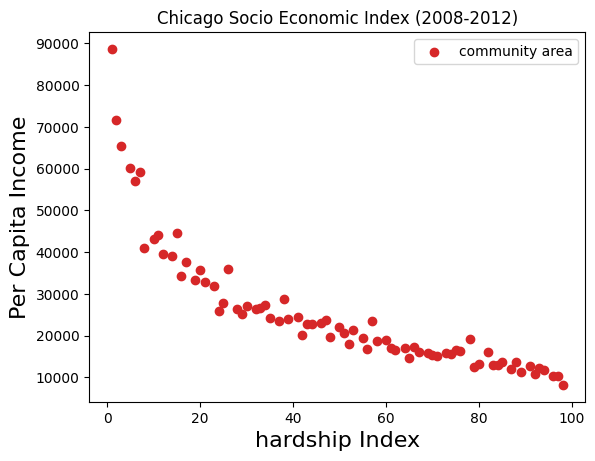

We see a strong correlation between the per capita income and the hardship index. 
 The hardship index rises for regions where the per capita income is lower. 
 We have a negative correlation between the two variables.


In [52]:
#!pip install matplotlib
import matplotlib.pyplot as plt

#assign the values to variables 
perCapita = %sql SELECT per_capita_income_ FROM chicago_SE_data;
hardship = %sql SELECT hardship_index FROM chicago_SE_data;

plt.scatter( hardship, perCapita, marker='o', color= 'C3',  label='community area')
plt.ylabel('Per Capita Income', fontsize=16)
plt.xlabel('hardship Index', fontsize=16)
plt.title('Chicago Socio Economic Index (2008-2012)')
plt.legend()
plt.show()
print('We see a strong correlation between the per capita income and the hardship index.','\n',
      'The hardship index rises for regions where the per capita income is lower.','\n',
      'We have a negative correlation between the two variables.')